# Підсумкова контрольна робота Машинне навчання. Виконала Яременко Вікторія

Завдання 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# загрузити дата сет, прочитати csv файл, вивести перші п'ять рядків

df = pd.read_csv("/content/sample_data/Global YouTube Statistics.csv", encoding='latin-1')
df_head_5 = df.head(5)
print(df_head_5)

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [ ]:
# Вивести розміри датасету
print("Розмір датасету:")
print(df.shape)

# Перевірити пропуски
print("\nПропуски:")
print(df.isnull().sum())

# Перевірити дублікати
print("\nДублікати:")
print(df.duplicated().sum())

Розмір датасету:
(995, 28)

Пропуски:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month         

In [ ]:
# Замінити пропуски на середнє значення та змінити тип даних на float для числових стовпців
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Замінити пропуски у строкових стовпцях на "Unknown"
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].fillna('Unknown')

# Видалити рядки, де є пропуски у числових стовпцях
df = df.dropna(subset=numeric_columns)

# Вивести розміри датасету
print("Розмір датасету після обробки пропусків:")
print(df.shape)

# Перевірити кількість пропусків (повинно бути всюди 0)
print("\nКількість пропусків після обробки:")
print(df.isnull().sum())

Розмір датасету після обробки пропусків:
(995, 28)

Кількість пропусків після обробки:
rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month

In [ ]:
# Перевірити кількість пропусків (повинно бути всюди 0)
print("\nКількість пропусків після заміни:")
print(df.isnull().sum())



Кількість пропусків після заміни:
rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date        

In [ ]:
# Перевірити кількість унікальних країн у стовпці "Country"
unique_countries = df['Country'].nunique()

# Вивести кількість унікальних країн
print("Кількість унікальних країн:", unique_countries)


Кількість унікальних країн: 50


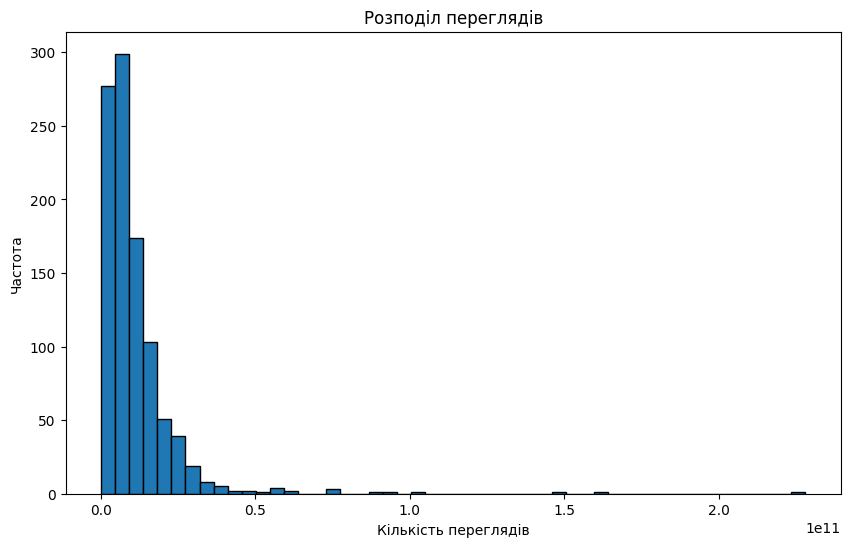

In [ ]:
# Побудувати діаграму розподілу переглядів
df['video views'].plot(kind='hist', bins=50, edgecolor='black', figsize=(10, 6))
plt.title('Розподіл переглядів')
plt.xlabel('Кількість переглядів')
plt.ylabel('Частота')
plt.show()


In [ ]:
# Визначити максимальну, мінімальну та середню кількість переглядів
max_views = df['video views'].max()
min_views = df['video views'].min()
mean_views = df['video views'].mean()

# Вивести результати
print("Максимальна кількість переглядів:", max_views)
print("Мінімальна кількість переглядів:", min_views)
print("Середня кількість переглядів:", mean_views)


Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


In [ ]:
# Знайти країну, де найбільше відео було завантажено на YouTube
most_videos_country = df.loc[df['uploads'].idxmax()]['Country']

# Вивести результат
print("Країна з найбільшою кількістю завантажених відео:", most_videos_country)


Країна з найбільшою кількістю завантажених відео: India


In [ ]:
# Знайти відео з найбільшою та найменшою кількістю завантажень uploads
max_uploads_video = df.loc[df['uploads'].idxmax()]['Title']
min_uploads_video = df.loc[df['uploads'].idxmin()]['Title']

# Вивести результат
print("Відео з найбільшою кількістю завантажень uploads:", max_uploads_video)
print("Відео з найменшою кількістю завантажень uploads:", min_uploads_video)


Відео з найбільшою кількістю завантажень uploads: ABP NEWS
Відео з найменшою кількістю завантажень uploads: Music


Висновок: У цій практичній роботі я завантажила датасет з ресурсу Kaggle та прочитала його за допомогою бібліотеки Pandas у Python.

Провела перевірку даних на наявність пропусків (порожніх значень) та замінила їх середніми значеннями по відповідним стовпцям.

Визначила кількість унікальних країн, представлених у датасеті.

Побудувала гістограму розподілу кількості переглядів відео.

Визначила максимальну, мінімальну та середню кількість переглядів відео в датасеті.

Знайшла країну, де найбільше відео було завантажено на YouTube.

Знайшла відео з найбільшою та найменшою кількістю завантажень ("uploads").